In [1]:
from IPython.core.display import HTML
with open('../style.css') as file:
    css = file.read()
HTML(css)

# Dijkstra's Shortest Path Algorithm

In [2]:
%%capture
%run Heap-Array.ipynb

In [3]:
def shortest_path(source, Edges):
    Distance = { source: 0 }
    Fringe   = []          # priority queue, organized as array based heap
    insert(Fringe, (0, source))
    while Fringe != []:
        d, u = remove(Fringe)
        for v, l in Edges[u]:
            dv = Distance.get(v, None)
            if dv == None or d + l < dv:
                if dv != None:
                    elevate(Fringe, v, d + l)
                else:
                    insert(Fringe, (d + l, v))
                Distance[v] = d + l
    return Distance

Below is an implementation of Dijkstra's shortest path algorithm that adds some visualization.

In [4]:
def shortest_path(source, Edges):
    Distance = { source: 0 }
    Visited  = { source }  # this set is only needed for visualization
    Fringe   = []          # priority queue, organized as array based heap
    insert(Fringe, (0, source))
    while Fringe != []:
        display(heapToDot(Fringe))
        d, u = remove(Fringe)
        display(toDot(source, u, Edges, Fringe, Distance, Visited))
        print('_' * 80)
        for v, l in Edges[u]:
            dv = Distance.get(v, None)
            if dv == None or d + l < dv:
                if dv != None:
                    elevate(Fringe, v, d + l)
                else:
                    insert(Fringe, (d + l, v))
                Distance[v] = d + l
        Visited |= { u }
    display(toDot(source, None, Edges, Fringe, Distance, Visited))
    return Distance

## Code to Display the Directed Graph

In [5]:
import graphviz as gv

The function $\texttt{toDot}(\texttt{source}, \texttt{Edges}, \texttt{Fringe}, \texttt{Distance}, \texttt{Visited})$ takes a graph that is represented by 
its `Edges`, a set of nodes `Fringe`, and a dictionary `Distance` that has the distance of a node from the node `source`,  and set `Visited` of nodes that have already been visited.

In [6]:
def toDot(source, p, Edges, Fringe, Distance, Visited):
    V = set()
    for x in Edges.keys():
        V.add(x)
    dot = gv.Digraph(node_attr={'shape': 'record', 'style': 'rounded'})
    dot.attr(rankdir='LR', size='8,5')
    for x in V:
        if x == source:
            dot.node(str(x), color='blue', shape='doublecircle')
        else:
            d = str(Distance.get(x, ''))
            if x == p:
                dot.node(str(x), label='{' + str(x) + '|' + d + '}', color='magenta')
            elif x in Distance and (Distance[x], x) in Fringe:
                dot.node(str(x), label='{' + str(x) + '|' + d + '}', color='red')
            elif x in Visited:
                dot.node(str(x), label='{' + str(x) + '|' + d + '}', color='blue')
            else:
                dot.node(str(x), label='{' + str(x) + '|' + d + '}')
    for u in V:
        for v, l in Edges[u]:
            dot.edge(str(u), str(v), label=str(l))
    return dot

## Code for Testing

In [7]:
a = Node('a')
b = Node('b')
c = Node('c')
d = Node('d')
e = Node('e')
f = Node('f')
g = Node('g')
h = Node('h')

In [8]:
Edges = { a: [ (c, 2), (b, 9)], 
          b: [(d, 1)],
          c: [(e, 5), (g, 3)],  
          d: [(f, 2), (e, 4)],  
          e: [(f, 1), (b, 2)],
          f: [(h, 5)],
          g: [(e, 1)],
          h: []
        }

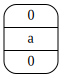

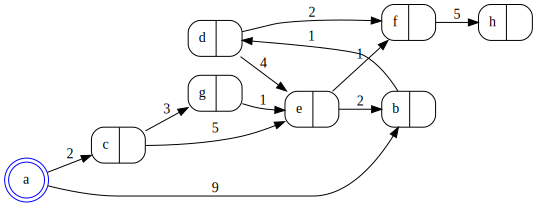

________________________________________________________________________________


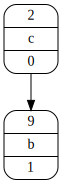

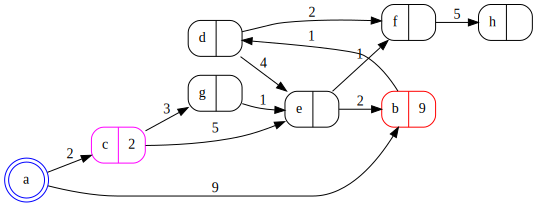

________________________________________________________________________________


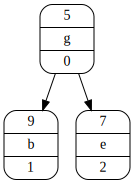

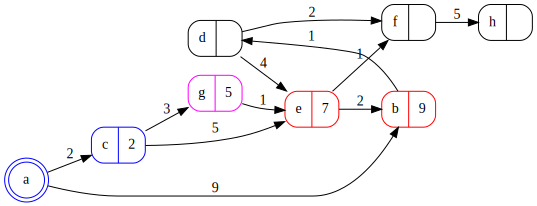

________________________________________________________________________________


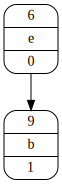

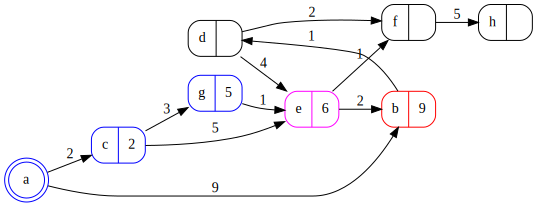

________________________________________________________________________________


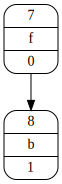

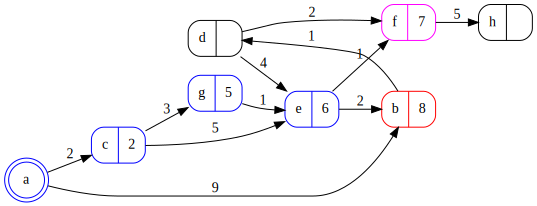

________________________________________________________________________________


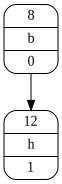

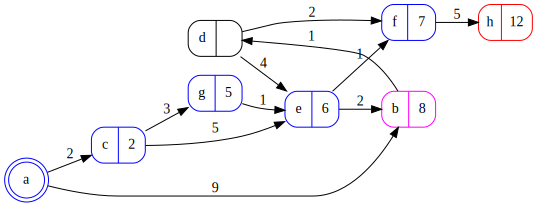

________________________________________________________________________________


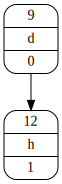

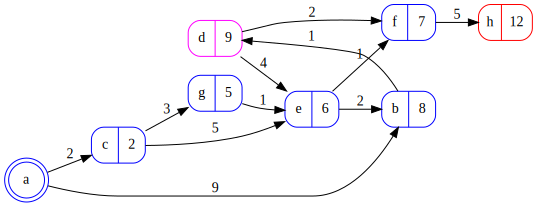

________________________________________________________________________________


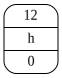

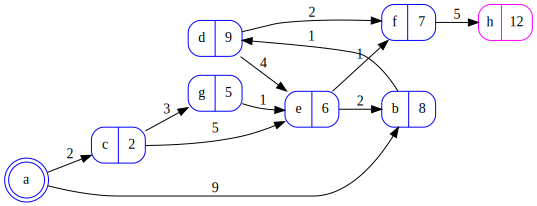

________________________________________________________________________________


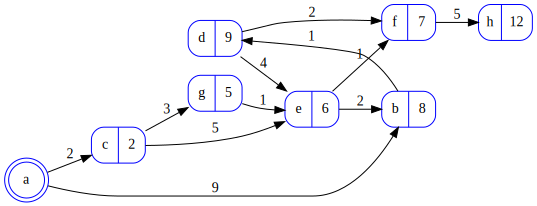

{Node(a:0): 0,
 Node(c:0): 2,
 Node(b:0): 8,
 Node(e:0): 6,
 Node(g:0): 5,
 Node(f:0): 7,
 Node(h:0): 12,
 Node(d:0): 9}

In [9]:
sp = shortest_path(a, Edges)
sp

# Crossing the Tunnel

Four persons, Alice, Britney, Charly and Daniel have to cross a tunnel.
The tunnel is so narrow, that at most two persons can cross it together.
In order to cross the tunnel, a torch is needed.  Together, they only
have a single torch.
  1. Alice   is the fastest and can cross the tunnel in 1 minute.
  2. Britney needs 2 minutes to cross the tunnel.
  3. Charly  is slower and needs 4 minutes.
  4. Daniel  is slowest and takes 5 minutes to cross the tunnel.
  
What is the fastest plan to cross the tunnel?

In [10]:
All  = frozenset({ 'Alice', 'Britney', 'Charly', 'Daniel', 'Torch' })
Time = { 'Alice': 1, 'Britney': 2, 'Charly': 4, 'Daniel': 5, 'Torch': 0 }

The function $\texttt{power}(M)$ defined below computes the power list of the set $M$, i.e. we have:
$$ \texttt{power}(M) = 2^M = \bigl\{A \mid A \subseteq M \bigr\} $$

In [11]:
def power(M):
    if M == set():
        return { frozenset() }
    else:
        C  = set(M)  # C is a copy of M as we don't want to change the set M
        x  = C.pop() # pop removes the element x from the set C
        P1 = power(C)
        P2 = { A | {x} for A in P1 }
        return P1 | P2

If $B$ is a set of persons, then $\texttt{duration}(B)$ is the time that this group needs to cross the tunnel.
$B$ also contains `'Torch'`.

In [12]:
NodeDict = { S: Node(S) for S in power(All) }

In [13]:
def duration(B):
    return max(Time[x] for x in B)

$\texttt{left_right}(S)$ describes a crossing of the tunnel from left to right.

In [14]:
def left_right(S):
    return [(NodeDict[S - B], duration(B)) for B in power(S) if 'Torch' in B and 2 <= len(B) <= 3]

$\texttt{right_left}(S)$ describes a crossing of the tunnel from right to left.

In [15]:
def right_left(S):
    return [(NodeDict[S | B], duration(B)) for B in power(All - S) if 'Torch' in B and 2 <= len(B) <= 3]

In [16]:
Edges = { Node(S): left_right(S) + right_left(S) for S in power(All) }
len(Edges)

32

The function `shortest_path` is Dikstra's algorithm.  It returns both a dictionary containing the parents and a dictionary 
with the distances.

In [17]:
def shortest_path(source, Edges):
    Distance = { source: 0 }
    Parent   = {}
    Fringe   = []
    insert(Fringe, (0, source) )
    while Fringe != []:
        d, u = remove(Fringe)
        for v, l in Edges[u]:
            dv = Distance.get(v, None)
            if dv == None or d + l < dv:
                if dv != None:
                    elevate(Fringe, v, d + l)
                else:
                    insert(Fringe, (d + l, v))
                Distance[v] = d + l
                Parent[v] = u
    return Parent, Distance

In [18]:
start = Node(frozenset(All))

In [19]:
Parent, Distance = shortest_path(start, Edges)

Let us see whether the goal was reachable and how long it takes to reach the goal.

In [20]:
goal = NodeDict[frozenset()]
Distance[goal]

12

Given to nodes `source` and `goal` and a dictionary containing the parent of every node, the function
`find_path` returns the path from `source` to `goal`.

In [21]:
def find_path(source, goal, Parent):
    p = Parent.get(goal)
    if p == None:
        return [source]
    return find_path(source, p, Parent) + [goal]

In [22]:
Path = [x.mValue for x in find_path(NodeDict[frozenset(All)], NodeDict[frozenset()], Parent)]

In [23]:
def print_path():
    total = 0
    print("_" * 81);
    for i in range(len(Path)):
        Left  = set(Path[i])
        Right = set(All) - set(Left)
        if Left == set() or Right == set():
            print(Left, " " * 25, Right)
        else:
            print(Left, " " * 30, Right)
        print("_" * 81);
        if i < len(Path) - 1:
            if "Torch" in Path[i]:
                Diff = set(Path[i]) - set(Path[i+1])
                time = duration(Diff)
                total += time
                print(" " * 20, ">>> ", Diff, ':', time, " >>>")
            else:
                Diff = set(Path[i+1]) - set(Path[i])
                time = duration(Diff)
                total += time
                print(" " * 20, "<<< ", Diff, ':', time, " <<<")
            print("_" * 81)
    print('Total time:', total, 'minutes.')

In [24]:
print_path()

_________________________________________________________________________________
{'Alice', 'Charly', 'Torch', 'Britney', 'Daniel'}                           set()
_________________________________________________________________________________
                     >>>  {'Alice', 'Britney', 'Torch'} : 2  >>>
_________________________________________________________________________________
{'Charly', 'Daniel'}                                {'Alice', 'Britney', 'Torch'}
_________________________________________________________________________________
                     <<<  {'Torch', 'Alice'} : 1  <<<
_________________________________________________________________________________
{'Torch', 'Alice', 'Charly', 'Daniel'}                                {'Britney'}
_________________________________________________________________________________
                     >>>  {'Torch', 'Charly', 'Daniel'} : 5  >>>
______________________________________________________________________________